In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('EarthQuake_data_with_prep.csv')
df

,time,latitude,longitude,depth,mag,nst,gap,dmin
0,2023-10-20T23:00:21.109Z,14.3667,-93.4221,10.000,4.9,100.000000,91.0,2.272
1,2023-10-20T21:21:24.042Z,-19.1188,-173.3136,10.000,4.5,19.000000,173.0,2.705
2,2023-10-20T19:51:55.439Z,0.7788,125.2063,51.393,5.2,194.000000,44.0,2.160
3,2023-10-20T19:34:02.111Z,-5.4912,150.2567,124.504,4.9,42.000000,82.0,2.298
4,2023-10-20T19:16:09.952Z,30.9618,141.4852,35.000,4.5,33.000000,128.0,2.574
...,...,...,...,...,...,...,...,...
1449,2016-10-15T00:50:02.980Z,-17.6334,-178.6128,547.860,4.5,72.952641,79.0,3.180
1450,2016-10-15T00:46:53.850Z,-1.0721,-24.7087,10.000,4.5,72.952641,114.0,12.128
1451,2016-10-14T22:36:20.310Z,16.5779,148.1442,10.000,4.5,72.952641,167.0,2.624
1452,2016-10-14T22:02:34.010Z,16.4765,148.4049,10.000,4.6,72.952641,88.0,2.797


In [106]:
df['timestamp'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df

,time,latitude,longitude,depth,mag,nst,gap,dmin,timestamp
0,2023-10-20T23:00:21.109Z,14.3667,-93.4221,10.000,4.9,100.000000,91.0,2.272,2023-10-20 23:00:21.109
1,2023-10-20T21:21:24.042Z,-19.1188,-173.3136,10.000,4.5,19.000000,173.0,2.705,2023-10-20 21:21:24.042
2,2023-10-20T19:51:55.439Z,0.7788,125.2063,51.393,5.2,194.000000,44.0,2.160,2023-10-20 19:51:55.439
3,2023-10-20T19:34:02.111Z,-5.4912,150.2567,124.504,4.9,42.000000,82.0,2.298,2023-10-20 19:34:02.111
4,2023-10-20T19:16:09.952Z,30.9618,141.4852,35.000,4.5,33.000000,128.0,2.574,2023-10-20 19:16:09.952
...,...,...,...,...,...,...,...,...,...
1449,2016-10-15T00:50:02.980Z,-17.6334,-178.6128,547.860,4.5,72.952641,79.0,3.180,2016-10-15 00:50:02.980
1450,2016-10-15T00:46:53.850Z,-1.0721,-24.7087,10.000,4.5,72.952641,114.0,12.128,2016-10-15 00:46:53.850
1451,2016-10-14T22:36:20.310Z,16.5779,148.1442,10.000,4.5,72.952641,167.0,2.624,2016-10-14 22:36:20.310
1452,2016-10-14T22:02:34.010Z,16.4765,148.4049,10.000,4.6,72.952641,88.0,2.797,2016-10-14 22:02:34.010


In [107]:
X = df[['latitude', 'longitude','depth','nst','gap','dmin']]
y = df[['mag']]

In [108]:
X

,latitude,longitude,depth,nst,gap,dmin
0,14.3667,-93.4221,10.000,100.000000,91.0,2.272
1,-19.1188,-173.3136,10.000,19.000000,173.0,2.705
2,0.7788,125.2063,51.393,194.000000,44.0,2.160
3,-5.4912,150.2567,124.504,42.000000,82.0,2.298
4,30.9618,141.4852,35.000,33.000000,128.0,2.574
...,...,...,...,...,...,...
1449,-17.6334,-178.6128,547.860,72.952641,79.0,3.180
1450,-1.0721,-24.7087,10.000,72.952641,114.0,12.128
1451,16.5779,148.1442,10.000,72.952641,167.0,2.624
1452,16.4765,148.4049,10.000,72.952641,88.0,2.797


In [109]:
y

,mag
0,4.9
1,4.5
2,5.2
3,4.9
4,4.5
...,...
1449,4.5
1450,4.5
1451,4.5
1452,4.6


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [111]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.52966718, 0.24053951, 0.01252264, 0.2238806 , 0.30152672,
        0.05567742],
       [0.30856314, 0.01855017, 0.01252264, 0.02238806, 0.61450382,
        0.06634954],
       [0.43994657, 0.8480281 , 0.07604585, 0.45771144, 0.1221374 ,
        0.05291696],
       ...,
       [0.54426769, 0.91176416, 0.01252264, 0.15659861, 0.59160305,
        0.06435314],
       [0.54359815, 0.91248855, 0.01252264, 0.15659861, 0.29007634,
        0.06861706],
       [0.35289092, 0.9640025 , 0.28300236, 0.15659861, 0.1259542 ,
        0.18394006]])

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(1163, 6) (291, 6) (1163, 1) (291, 6)


### Use RandomForest Regression to Prediction

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

<ipython-input-113-0e2b706809eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [114]:
y_rf_pred = rf.predict(X_test)
y_rf_pred

array([4.734 , 4.862 , 4.533 , 5.156 , 5.776 , 4.914 , 5.697 , 4.79  ,
       4.599 , 5.011 , 4.617 , 4.575 , 4.841 , 4.535 , 4.549 , 5.177 ,
       4.626 , 4.804 , 4.932 , 4.7219, 4.598 , 5.075 , 4.814 , 5.191 ,
       4.863 , 4.548 , 4.858 , 4.563 , 4.921 , 4.636 , 4.543 , 5.2213,
       5.319 , 4.815 , 4.853 , 4.877 , 4.63  , 4.603 , 4.899 , 4.746 ,
       5.17  , 4.589 , 4.909 , 4.927 , 5.246 , 4.54  , 4.681 , 4.772 ,
       4.538 , 4.736 , 4.849 , 4.679 , 5.997 , 4.617 , 4.725 , 4.555 ,
       4.545 , 4.58  , 5.045 , 4.707 , 4.81  , 6.008 , 4.68  , 5.463 ,
       4.735 , 4.829 , 4.6149, 4.692 , 4.835 , 4.639 , 5.1   , 4.634 ,
       4.674 , 4.613 , 4.619 , 5.089 , 4.781 , 4.896 , 4.663 , 4.667 ,
       5.075 , 4.646 , 4.585 , 4.682 , 4.61  , 4.632 , 4.777 , 4.533 ,
       5.158 , 4.572 , 4.832 , 4.596 , 4.61  , 4.664 , 4.7565, 4.596 ,
       4.721 , 4.566 , 5.287 , 4.6   , 4.699 , 5.25  , 4.852 , 4.727 ,
       4.675 , 4.894 , 4.612 , 4.88  , 4.687 , 4.77  , 4.58  , 4.866 ,
      

In [115]:
y_test

,mag
497,4.7
1260,4.5
411,4.5
1179,4.8
1033,5.2
...,...
626,4.5
477,4.5
674,4.9
1296,4.6


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")

Mean Absolute Error: 0.1991477663230242
Mean Squared Error: 0.0867286675601374
Root Mean Squared Error: 0.29449731333263024
R-squared: 0.4808078613952228


### Use KNeighbors Regression to Prediction

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [118]:
y_knn_pred = knn.predict(X_test)
y_knn_pred

array([[4.936 ],
       [4.764 ],
       [4.672 ],
       [5.04  ],
       [5.104 ],
       [4.848 ],
       [5.352 ],
       [4.716 ],
       [4.6   ],
       [5.008 ],
       [4.948 ],
       [4.804 ],
       [5.    ],
       [4.68  ],
       [4.588 ],
       [5.324 ],
       [4.664 ],
       [4.76  ],
       [4.856 ],
       [4.8788],
       [4.652 ],
       [4.764 ],
       [4.648 ],
       [4.988 ],
       [4.776 ],
       [4.584 ],
       [4.848 ],
       [4.684 ],
       [4.864 ],
       [4.652 ],
       [4.66  ],
       [5.2924],
       [5.42  ],
       [4.792 ],
       [4.864 ],
       [4.824 ],
       [4.78  ],
       [4.736 ],
       [4.904 ],
       [4.748 ],
       [5.088 ],
       [4.596 ],
       [4.952 ],
       [4.936 ],
       [5.    ],
       [4.672 ],
       [4.72  ],
       [4.768 ],
       [4.624 ],
       [4.656 ],
       [4.88  ],
       [4.732 ],
       [5.26  ],
       [4.636 ],
       [4.94  ],
       [4.592 ],
       [4.704 ],
       [4.668 ],
       [5.024 

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_rmse = knn_mse ** 0.5
knn_r2 = r2_score(y_test, y_knn_pred)

print(f"Mean Absolute Error: {knn_mae}")
print(f"Mean Squared Error: {knn_mse}")
print(f"Root Mean Squared Error: {knn_rmse}")
print(f"R-squared: {knn_r2}")

Mean Absolute Error: 0.22915738831615123
Mean Squared Error: 0.10156851024054984
Root Mean Squared Error: 0.31869814910123
R-squared: 0.3919706882372316


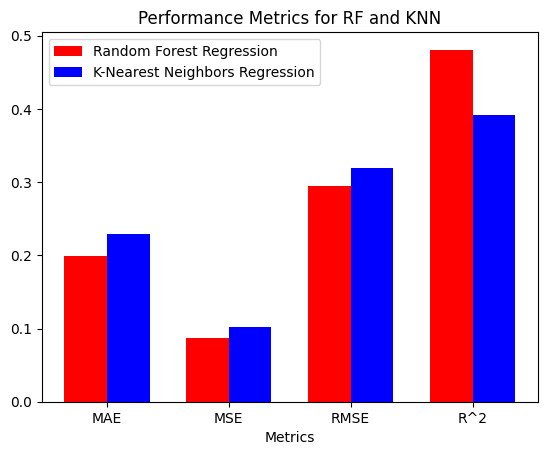

In [125]:
N = 4
ind = np.arange(N)
width = 0.35

rf_metrics = [rf_mae, rf_mse, rf_rmse, rf_r2]
kn_metrics = [knn_mae, knn_mse, knn_rmse, knn_r2]

fig, ax = plt.subplots()
rects1 = ax.bar(ind, rf_metrics, width, label='Random Forest Regression', color='r')
rects2 = ax.bar(ind + width, kn_metrics, width, label='K-Nearest Neighbors Regression', color='b')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE', 'R^2'])
ax.legend()

plt.show()

In [126]:
data = {'model': ['Random Forest Regression', 'K-Nearest Neighbors Regression'],
        'MAE': [rf_mae, knn_mae],
        'MSE': [rf_mse, knn_mse],
        'RMSE': [rf_rmse, knn_rmse],
        'R^2': [rf_r2, knn_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MAE,MSE,RMSE,R^2
0,Random Forest Regression,0.199148,0.086729,0.294497,0.480808
1,K-Nearest Neighbors Regression,0.229157,0.101569,0.318698,0.391971
